# Introduction to data wrangling with pandas

NICAR 2022, Jonathan Soma / js4571@columbia.edu / [@dangerscarf](https://twitter.com/dangerscarf)

Featuring incredibly weird and wild data from the [National Electronic Injury Surveillance System (NEISS)](https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data).

## Reading in our data

I'll give you this one for free!

```python
import pandas as pd

df = pd.read_csv("neiss_cleaned.tsv", sep='\t', encoding='latin-1')
df.head()
```

In [1]:
import pandas as pd

df = pd.read_csv("neiss_cleaned.tsv", sep='\t', encoding='latin-1')
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,1,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,2,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,2,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


## Cleaning up our data

### Age

In [2]:
df.Age.median()

29.0

<AxesSubplot:>

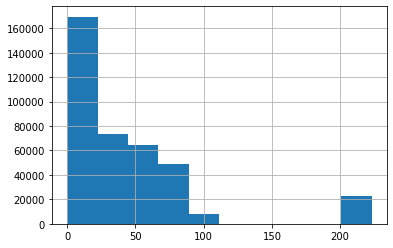

In [3]:
df.Age.hist()

<AxesSubplot:>

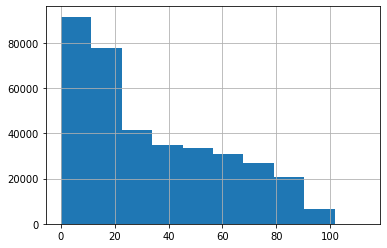

In [4]:
df = df[df.Age < 200]
df.Age.hist()

### Race

In [5]:
df.Race.value_counts()

1.0    151268
0.0    136992
2.0     51135
3.0     18907
4.0      4223
5.0      1175
6.0       388
Name: Race, dtype: int64

## Searching through our data

## Merging our datasets

We're going to merge with another dataset.